In [166]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [167]:
dataset = pd.read_csv("datasets/breast-cancer-wisconsin.data")
dataset.replace('?', np.nan, inplace=True)
dataset.dropna(axis = 1 ,inplace=True)
dataset

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,3,2,1,2
1,1015425,3,1,1,1,2,3,1,1,2
2,1016277,6,8,8,1,3,3,7,1,2
3,1017023,4,1,1,3,2,3,1,1,2
4,1017122,8,10,10,8,7,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,2
695,888820,5,10,10,3,7,8,10,2,4
696,897471,4,8,6,4,3,10,6,1,4


In [168]:
datatype = dataset.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())
newdata = []
for data in datatype:
    newdata.append(datatype[1])
datatype = newdata
le = LabelEncoder()
for i in range(len(datatype)):
    if datatype[i] == False:
        dataset.iloc[:,i] = le.fit_transform(dataset.iloc[:,i])  

In [169]:
xtrain, xtest , ytrain, ytest = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:,dataset.shape[1]-1], test_size=0.2, train_size=0.8, random_state=0)
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [170]:
svcmodel = SVC(kernel='rbf', degree=5, C=1.0, gamma='auto', cache_size=12000, probability=True)
svcmodel.fit(xtrain, ytrain)

SVC(cache_size=12000, degree=5, gamma='auto', probability=True)

In [171]:
ypred = svcmodel.predict(xtest)

In [172]:
ypred

array([4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 4])

In [173]:
ytest.values.reshape(1,-1)  

array([[4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
        4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
        4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
        4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
        2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
        2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4,
        2, 4, 2, 2, 2, 2, 4, 4]])

In [174]:
cm = confusion_matrix(ytest, ypred)
accuracy = accuracy_score(ytest, ypred)

In [175]:
print(cm)

[[82  3]
 [ 2 53]]


In [176]:
print(accuracy*100, "%")

96.42857142857143 %


In [177]:
yprobofTrue = svcmodel.predict_proba(xtest)

In [178]:
yt = np.empty((0,1))
for probs in yprobofTrue:
    yt = np.append(yt, probs[1])

yprobofTrue = yt

In [179]:
ypred.shape

(140,)

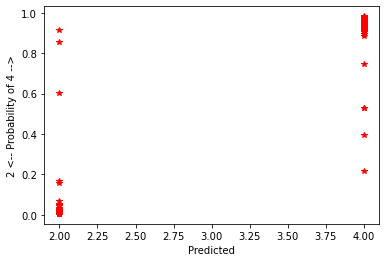

In [180]:
plt.plot(ytest, yprobofTrue, 'r*')
plt.xlabel('Predicted')
plt.ylabel('2 <-- Probability of 4 -->')
plt.show()

In [181]:
param = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 10], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'gamma': ('auto', 'scale')}

In [202]:
clf = GridSearchCV(SVC(probability=True), param, cv=5, refit=True)
clf.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 10],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [203]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_degree',
 'param_gamma',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [204]:
ypred = clf.predict(xtest)

In [205]:
accuracy = accuracy_score(ytest, ypred)
yprobofTrue = clf.predict_proba(xtest)

In [206]:
accuracy*100

97.85714285714285

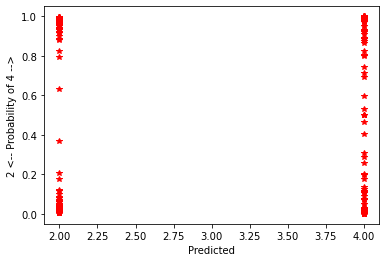

In [207]:
plt.plot(ytest, yprobofTrue, 'r*')
plt.xlabel('Predicted')
plt.ylabel('2 <-- Probability of 4 -->')
plt.show()

In [209]:
svcmodel.support_vectors_

array([[-3.46659756e-01, -4.97748451e-01,  2.79856634e-01,
         6.10533918e-01,  7.51504525e-02,  1.65950384e+00,
         2.44348381e-01,  1.01395949e+00, -3.33600749e-01],
       [ 2.23705818e-01,  1.28953363e+00,  2.79856634e-01,
         9.43552418e-01,  7.51504525e-02, -1.07677730e-01,
         2.44348381e-01,  4.45887381e-02, -3.33600749e-01],
       [-1.35335705e+00, -1.40292035e-01, -6.80143376e-01,
        -7.21540084e-01, -6.29621858e-01, -5.49473124e-01,
        -1.71341852e-01,  1.01395949e+00, -3.33600749e-01],
       [-9.44445185e-02,  5.74620799e-01, -4.01433696e-02,
        -5.55030834e-02,  7.79922763e-01, -1.07677730e-01,
        -1.71341852e-01,  6.90835904e-01,  8.59663468e-01],
       [ 8.86864684e-02,  9.32077216e-01, -6.80143376e-01,
        -3.88521584e-01,  7.51504525e-02, -5.49473124e-01,
        -5.87032085e-01, -6.01658428e-01, -3.33600749e-01],
       [-4.44879223e-01,  2.17164382e-01, -6.80143376e-01,
        -7.21540084e-01,  1.13230892e+00, -1.076777